In [4]:
import numpy as np
import math
from random import random
import matplotlib.pyplot as plt
import sympy
from random import seed
import math 

# Question 1 (2 points)
Use online, library and other resources to answer the following questions. You can use Internet references, library resources, your prior knowledge, and any other resource. For each question, provide references that you used.

Provide two applications in computer science for each of the following methodologies.


a. Monte Carlo Simulation\
b. Markov Decision Process\
c. Random Walks\
d. Resampling method


## Random Walks
The Random Walks theory applying in the investment. According to random walk theory, market price variations have the same distribution and are unrelated. As a result, it is concluded that a curent stock price and past movement cannot be used to forecast its future movement. In light of this, random walk theory states that stocks follow an unpredictable and random direction, rendering all methods of stock price prediction useless in the long run. Thus, we consider using random walks model to predict the stock price in the furture.

Reference: Phung, A. (2020, August 28). How can random walk theory be applied to investing https://www.investopedia.com/ask/answers/08/random-walk-theory.asp. 

## Monte Carlo Simulation
According to this article, Monte Carlo simulation improves project management. Graves (2001) spoke about the various forms of probability distributions that can be used to estimate project durations. The merit of Monte Carlo Simulation model is that it can simplify time management and cost management, and that the PM team can know the consequences of the project without having a huge cost. They will be able to predict project schedules and budgets that are more practical.

Reference: Kwak, Y., Ingall, L. Exploring Monte Carlo Simulation Applications for Project Management. *Risk Manag 9, 44*–57 (2007). https://doi.org/10.1057/palgrave.rm.8250017






 

# Question 2 (4 points)
A gambler has the chance to enter a gamble using a fair coin. **The gambler needs to invest $100 to enter the game.** If the coin is tossed a head (p = 0.5), the gambler wins one dollar otherwise losses one dollar. The game stops after N=100 trials (100 times tossing the coin).

a) Model this problem and run a simulation model to determine if the gambler is better off getting into this game. Repeat the simulation when the number of trials N = 1000. 

Because the gambler needs to pay \$100 to join the game at least, so we set the first round if the gambler win, the full balance will be \$101. Conversely, if the gambler lose, the full balance will be \$99.

According to the question, the minimum rounds to play this game is 100 trals. After we run 100 times, the full balance is \$106. If we run 1000 times, the full balance is \$154. Therefore, I highly suggest gambler join the game as soon as possible(p = 0.5).



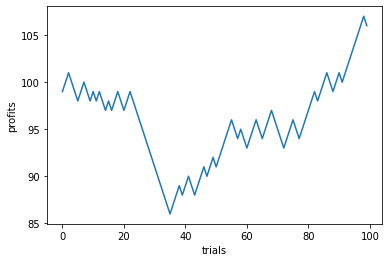

106

In [ ]:
def gamblerCoin(N, p):
  if N < 100:
    print("You need to invest $100 to enter the game")
    return
  seed(1)
  res = []
  res.append(99 if random() < (1-p) else 101) # first time tossing a coin, and needs to invest $100 at the beginning
  for i in range(1, N):
    tossed = -1 if random() < (1-p) else 1 
    tmp = res[i-1] + tossed # previous result + new result
    res.append(tmp) 
  plt.plot(res)
  plt.xlabel("trials")
  plt.ylabel("profits")
  plt.show()
  return res[-1]

gamblerCoin(100, 0.5)

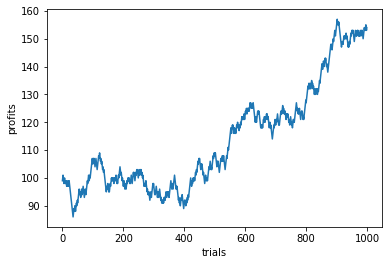

154

In [ ]:
gamblerCoin(1000, 0.5)

b) If the dealer uses an unfair coin (p = 0.49), does the gambler enters the game using N=100? Repeat the game when the number of trails N =1000.

- Compared to p = 0.5, the gambler will earn less money if p = 0.49
- N = 100 does not mean gambler will lose the money (the full balance is still 100)
- After the model run 1000 trials, the full balance is \$128. It's not caused a profunded effect for gambler 


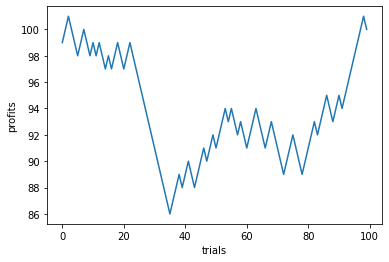

100

In [ ]:
gamblerCoin(100, 0.49)

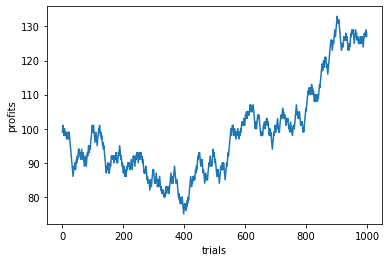

128

In [ ]:
gamblerCoin(1000, 0.49)

Now, the gambler is given a chance to exit the game only if the remaining dollar in the middle of the game is \$100 (for example the gambler can exit when 25 tosses left and he owns \$100). Let us call this situation State100.

c) Model this problem and run a simulation model to estimate the number of times the gambler can exit the game, when N= 100 and N=1000.
 - N = 100, 7 times
 - N = 1000, 44 times 
 - The default seed is `1`


In [ ]:
def stateOneHundred(N, p):
  State100 = 100
  seed(1)
  count = 0
  res = []
  res.append(99 if random() < (1-p) else 101) # first time tossing a coin, and needs to invest $100 at the beginning
  for i in range(1, N):
    tossed = -1 if random() < (1-p) else 1 
    tmp = res[i-1] + tossed # previous result + new result
    res.append(tmp)
    if tmp == State100:
      count += 1
  return count

print(stateOneHundred(100, 0.5))
print(stateOneHundred(1000, 0.5))

7
44


d) Is there any difference between different State100s? For example, do you see the gambler makes different decision when there are 20 tossing coin left compared with 2 tossing coin left.

Yes. for example, if 20 tossing coins left maybe the gambler is able to earn \$20. However the gambler will also have a chance to lose \$20 correspondingly. On the other hand, if the situation is 2 tossing coins left, the gambler only has a chance to earn \$2 or lose \$2 at most. Thus, the expected values are different, meaning that the gambler has a different choice to get the final result.

# Question 3 (5 points)
We want to simulate a dollar slot machine that has three reels (spinning cylinders). To play the game, we first insert \$1 and pull the handle. All three reels then spin independently, and each reel will stop randomly on one of the five pictures it contains. Once the reels stop, we examine the three pictures and determine our winnings. If we have exactly 2 cherries, we win \$1 (so we break even). If we have 3 bells, we win \$2. If we have 3 cherries, we win \$3. For all other outcomes, we win nothing. The composition of each reel is summarized below.

a. Provide details for a strategy to determine what picture each reel stops on, given a U (0,1) number. Detailed strategy means that you need to divide the uniform variable range U(0,1) into sub-intervals and assign pictures. For example, if the random variable is between 0 and x (x is between 0 and 1) then it is a cherry, etc.

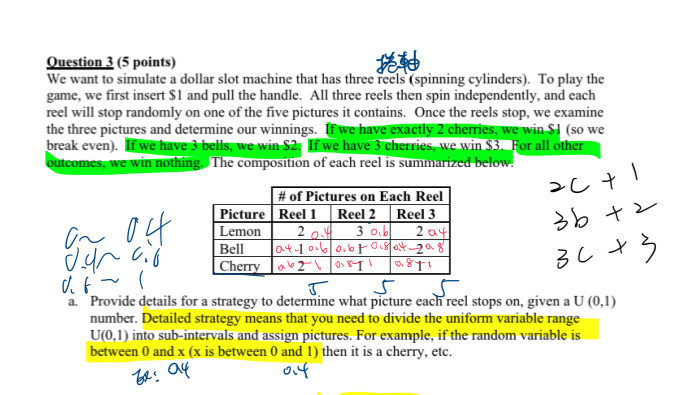

---
b. Complete the following table to simulate 5 replications of this system. What is the average profit over these five games?
- The average profit over these five games is negative 0.4.

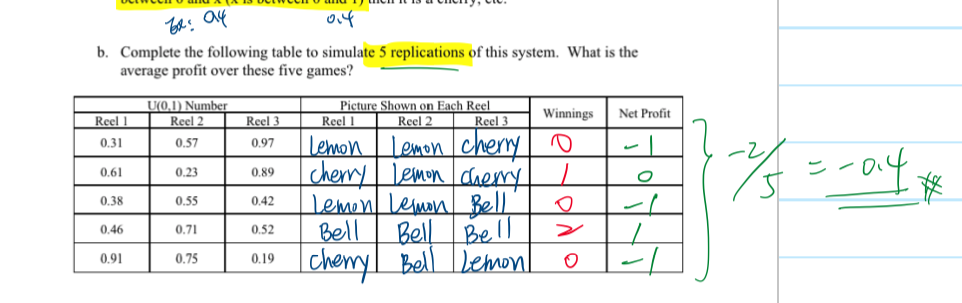

---

c. Assume that the gambler starts with \$100. Write a Python code to determine the expected value of the player after 50 rounds of the game.
- The `n` parameter specifies the number of rounds in the game, while the `profits` parameter specifies how much the gambler wants to start with. The result then shows your how much money do you have after game. The probability of a slot machine is used to create this model.
- please run the model to see the expected value below. 

In [ ]:
def slotMachine(n, profits):
  if profits <= 0:
    print("You cannot play the game") # must have money to enter the game
    return
  reelOne, reelTwo, reelThree = [], [], [] # three reels
  first = np.random.uniform(0, 1, n) # random selected between 0 to 1
  # set the probability for each picture
  for i in first:
    if i <= 0.4:
      reelOne.append("Lemon")
    elif i > 0.4 and i <= 0.6:
      reelOne.append("Bell")
    else:
      reelOne.append("Cherry")
  second = np.random.uniform(0, 1, n) # random selected between 0 to 1
  for i in second:
    if i <= 0.6:
      reelTwo.append("Lemon")
    elif i > 0.6 and i <= 0.8:
      reelTwo.append("Bell")
    else:
      reelTwo.append("Cherry")
  third = np.random.uniform(0, 1, n) # random selected between 0 to 1
  for i in third:
    if i <= 0.4:
      reelThree.append("Lemon")
    elif i > 0.4 and i <= 0.8:
      reelThree.append("Bell")
    else:
      reelThree.append("Cherry")
  zipped = zip(reelOne, reelTwo, reelThree) # zipped the results
  rounds = list(zipped)
  
  values = 0 # earn or lose the money per time (insert $1 for play game so needs minus 1 each time)
  for i in range(len(rounds)):
    if rounds[i][0] and rounds[i][1] and rounds[i][2] == "Cherry":
      values += 3
      values -= 1
    elif rounds[i][0] and rounds[i][1] or rounds[i][0] and rounds[i][2] or rounds[i][1] and rounds[i][2] == "Cherry":
      values += 1
      values -= 1
    elif rounds[i][0] and rounds[i][1] and rounds[i][2] == "Bell":
      values += 2
      values -= 1
    else:
      values += 0
      values -= 1
  return values+profits # net profits + your money

slotMachine(50, 100)

120

# Question 4 (5 points)
Consider the integral
a. What distribution function this probability distribution function represents? Use Normal distribution table to determine the “exact” value of I? (Show your work to receive credit. I’m not testing whether your calculator can integrate this numerically!)

b. Evaluate I using Monte Carlo integration using a Python code and U(0,1) random numbers. (Provide the details of the Python code.)

Numerical integration = 0.02709089119092142


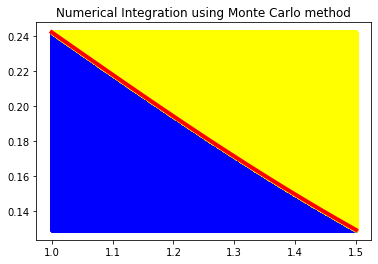

In [18]:
import random 
import numpy as np
import matplotlib.pyplot as plt

seed(2)
f = lambda x:(1/math.sqrt(2*np.pi))*np.exp(-x**2/2) # equation
a = 1
b = 1.5
NumSteps = 1000000 
XIntegral=[]  
YIntegral=[]
XRectangle=[]  
YRectangle=[]

ymin = f(a)
ymax = ymin
# extract min and max without repeated min/max
for i in range(NumSteps):
    x = a + (b - a) * float(i) / NumSteps # calculate the rectangle area
    y = f(x)
    if y < ymin: ymin = y
    if y > ymax: ymax = y

# Monte Carlo method
A = (b - a) * (ymax - ymin)
N = 1000000 
M = 0
for k in range(N):
    x = a + (b - a) * random.random()
    y = ymin + (ymax - ymin) * random.random()
    if y <= f(x):
            M += 1 
            XIntegral.append(x)
            YIntegral.append(y)  
    else:
            XRectangle.append(x) 
            YRectangle.append(y)              
NumericalIntegral = M / N * A
print ("Numerical integration = " + str(NumericalIntegral))

XLin=np.linspace(a,b)
YLin=[]
for x in XLin:
    YLin.append(f(x))

# plt.axis   ([a, b, 0, f(b)])                                            
plt.plot   (XLin,YLin, color="red" , linewidth="4") 
plt.scatter(XIntegral, YIntegral, color="blue", marker   =".") 
plt.scatter(XRectangle, YRectangle, color="yellow", marker   =".")
plt.title  ("Numerical Integration using Monte Carlo method")
plt.show()

# Question 5 (4 points)
Using the Gradient Descent algorithm and the Newton-Raphson method in Python to calculate the maximum/minimum value of

$$
𝑦 = 3𝑥^4 − 5𝑥+2
$$
Use Python codes to determine the possible local maximum/minimum of this function.

- According to the plot, we need to find the **minimum value** of the equation.

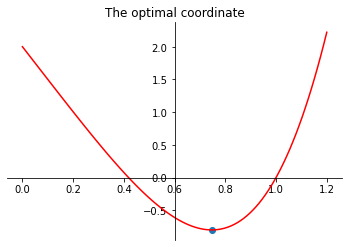

The last one X values of f(x) minimum is 0.746904008089606
The minimum value of y in the iterations is -0.8008779664943075


In [ ]:
def gradientDescent(Xvalue):
  x = np.linspace(0, 1.2, 100) 
  y= 3*x**4-5*x+2

  # visualize the equation in order to confirm we need to find the maximum or the minimum value
  fig = plt.figure()
  axdef = fig.add_subplot(1, 1, 1)
  axdef.spines['left'].set_position('center')
  axdef.spines['bottom'].set_position('zero')
  axdef.spines['right'].set_color('none')
  axdef.spines['top'].set_color('none')
  axdef.xaxis.set_ticks_position('bottom')
  axdef.yaxis.set_ticks_position('left')
  plt.plot(x,y, 'r')
  
  # according to the plot, we need to find the minimum value of the equation.

  Gradf = lambda x: 12*x**3-5  # define the gradient function (The derivative of y equation)

  ActualX = Xvalue
  LearningRate =  0.01 # learn rate variable, 0.01 not too many iterations and can keep the optimal solution
  PrecisionValue = 0.000001 # defines the degree of precision 
  PreviousStepSize = 1 
  MaxIteration = 10000 # will be used to stop the procedure if it does not converge
  IterationCounter = 0 # counter

  xValues = [] 
  while PreviousStepSize > PrecisionValue and IterationCounter < MaxIteration: # Define the gradient descent
      PreviousX = ActualX
      ActualX = ActualX - LearningRate * Gradf(PreviousX) # find the max 
      xValues.append(ActualX)
      PreviousStepSize = abs(ActualX - PreviousX) 
      IterationCounter = IterationCounter+1 
      # print("Number of iterations = ",IterationCounter,"\nActual value of x  is = ", ActualX) 

  # draw the maximum point of the function    
  plt.scatter(ActualX, 3*ActualX**4-5*ActualX+2)
  plt.title("The optimal coordinate")
  plt.show() 

  print('The last one X values of f(x) minimum is', xValues[-1])
  xValues = np.array(xValues) # change the array type to numpt array in order to compute smoothly
  y = (3*xValues**4)-5*xValues+2
  print("The minimum value of y in the iterations is", y[-1])

gradientDescent(1.2) # based on the plot, the far-right point value is 1.2, so let we start with 1.2

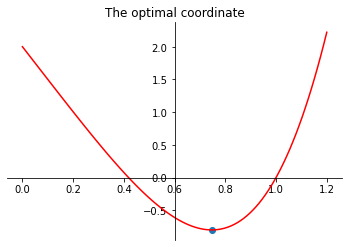

X value of f(x) minimum is  0.7469007910934801
The minimum value of y is -0.800877966598228


In [ ]:
def NewtonRaphsonMethod(xValue):
  x = np.linspace(0, 1.2, num = 100) # creates numerical sequences(start, stop, num: Number of samples to generate. Default is 50. Must be non-negative.)
  y = 3*x**4-5*x+2

  fig = plt.figure()
  axdef = fig.add_subplot(1, 1, 1)
  axdef.spines['left'].set_position('center')
  axdef.spines['bottom'].set_position('zero')
  axdef.spines['right'].set_color('none')
  axdef.spines['top'].set_color('none')
  axdef.xaxis.set_ticks_position('bottom')
  axdef.yaxis.set_ticks_position('left')

  # print('Value of x at the minimum of the function', x[np.argmin(y)]) # np.argmin(): returns the indices of the minimum values along an axis

  plt.plot(x,y, 'r')



  FirstDerivative = lambda x: 12*x**3-5
  SecondDerivative = lambda x: 36*x**2 

  ActualX = xValue
  PrecisionValue = 0.000001 
  PreviousStepSize = 1 
  MaxIteration = 10000 
  IterationCounter = 0 
  points = []
  while PreviousStepSize > PrecisionValue and IterationCounter < MaxIteration:
      PreviousX = ActualX
      ActualX = ActualX - FirstDerivative(PreviousX)/ SecondDerivative(PreviousX) # actual value - first derivative/ second derivative
      points.append(ActualX) # the iteration add in array
      PreviousStepSize = abs(ActualX - PreviousX) # diff between current and previous
      IterationCounter = IterationCounter+1 
      # print("Number of iterations = ",IterationCounter,"\nActual value of x  is = ",ActualX) 

  # draw the maximum point of the function    
  plt.scatter(ActualX, 3*ActualX**4-5*ActualX+2)
  plt.title("The optimal coordinate")
  plt.show()   
  print("X value of f(x) minimum is ", ActualX)
  print("The minimum value of y is", 3*ActualX**4-5*ActualX+2) 


NewtonRaphsonMethod(1.2)


In [ ]:
"""
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc
from google.colab import drive
drive.mount('/content/drive')
!cp drive/My Drive/Colab Notebooks/CSC_676_HW1_SimpleWorldY_YuntingChiu.ipynb
!jupyter nbconvert --to pdf mynotebook.ipynb
"""

In [ ]:
"""
from google.colab import drive
drive.mount('/content/drive')
!cp drive/My Drive/Colab Notebooks/Untitled.ipynb ./
!jupyter nbconvert --to pdf fileName.ipynb
"""